# Chapter 6: Hypothesis Testing

## Incomplete Data 

Creating accurate predictions is one of the most valuable skills in the job market today. Statisticians, economists, and data scientists use data gathered from specific populations in order to predict the future. Through computational and statistical techniques, we can make _statistical inferences_ to draw conclusions from data that are often incomplete.

As far as estimations of parameters that already exist, having full population data would mean that our questions about that population are answered. But because the cost of gathering a full set of information typically outweigh the benefits of having perfectly accurate data, we are okay with use data samples to draw inferences about past data and predict future observations. 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
mutual_fund_data = pd.read_csv("Top100MutualFunds.csv")
mutual_fund_data

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [3]:
mutual_fund_data["Category3"].value_counts()

Large cap                 88
Mid cap                    9
Health care                1
Communication Services     1
Small cap                  1
Name: Category3, dtype: int64

In [4]:
mutual_fund_data["Morningstar Category"].value_counts(normalize = True)

Large Growth      0.51
Large Value       0.20
Large Blend       0.17
Mid-Cap Growth    0.06
Mid-Cap Value     0.02
Health            0.01
Mid-Cap Blend     0.01
Communications    0.01
Small Value       0.01
Name: Morningstar Category, dtype: float64

In [5]:
mutual_fund_data.groupby("Morningstar Category").mean()

,Morningstar Rating
Morningstar Category,
Communications,5.000000
Health,5.000000
Large Blend,3.250000
Large Growth,3.755102
Large Value,3.750000
Mid-Cap Blend,4.000000
Mid-Cap Growth,4.333333
Mid-Cap Value,3.000000
Small Value,4.000000


In [6]:
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime
mutual_fund_dict = {}
symbols = list(mutual_fund_data["Symbol"])
start = datetime(1980, 1,1)
end = datetime(2020, 1,1)
print(start, end, symbols)

1980-01-01 00:00:00 2020-01-01 00:00:00 ['AGTHX', 'FCNTX', 'CWMAX', 'CWMCX', 'CWMEX', 'CWMFX', 'AIVSX', 'AWSHX', 'ANCFX', 'AMCFX', 'CAFAX', 'CAFCX', 'CAFEX', 'CAFFX', 'FMACX', 'TRBCX', 'AFMFX', 'AMRFX', 'CMLAX', 'CMLCX', 'CMLEX', 'CMLFX', 'FDGRX', 'FBGRX', 'AMCPX', 'EAGRX', 'AMRMX', 'FMAGX', 'HACAX', 'FLPSX', 'PRGFX', 'PRNHX', 'DFQTX', 'DFEOX', 'FLPKX', 'RPMGX', 'FOCPX', 'CNGAX', 'CNGCX', 'CNGEX', 'CNGFX', 'FNEFX', 'FOCKX', 'DFLVX', 'CDDRX', 'CDDYX', 'CDIRX', 'CVIRX', 'TWCUX', 'EGFFX', 'EGFIX', 'ANEFX', 'HLIEX', 'FRDPX', 'FRDAX', 'FRDRX', 'FRISX', 'PRHSX', 'PRILX', 'DDFIX', 'DDFRX', 'VAFAX', 'PCBIX', 'FCGAX', 'FGSRX', 'FIFRX', 'PRFDX', 'PRBLX', 'JVMIX', 'VWNFX', 'FKGRX', 'PRDGX', 'AULDX', 'AULGX', 'AULNX', 'AULRX', 'AULYX', 'AKRSX', 'MFEIX', 'POLIX', 'FKDNX', 'MADVX', 'VWUSX', 'LSGRX', 'SEEGX', 'PRMTX', 'CUSUX', 'ERASX', 'ERSMX', 'DFSVX', 'CMGIX', 'SBLYX', 'AKRIX', 'MFEGX', 'FDNRX', 'FDTRX', 'FDYZX', 'BBVLX', 'PEYAX', 'TWCGX']


In [7]:
yf.pdr_override()
fund_data = web.get_data_yahoo(symbols, start, end)

[*********************100%***********************]  100 of 100 completed


In [8]:
close_data = fund_data["Adj Close"]
close_data

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,PRNHX,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.723486,...,0.599536,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.719449,...,0.588704,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730548,...,0.595769,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733576,...,0.580033,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751739,...,0.586269,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.097603,43.498638,33.953682,41.269047,41.468189,28.316504,28.111412,38.230671,38.514614,51.184906,...,42.597168,80.298607,43.188068,32.569065,106.341019,29.883804,43.968906,14.698989,29.131346,36.265896
2019-12-26,38.185303,43.719612,34.099632,41.387012,41.586231,28.408524,28.203421,38.318684,38.603233,51.416252,...,42.654209,80.374329,43.536552,32.785179,107.248009,30.146883,44.383232,14.812881,29.243483,36.535660
2019-12-27,38.211613,43.711113,34.099632,41.441452,41.640713,28.400156,28.186689,38.345081,38.629822,51.465824,...,42.504475,80.290184,43.512787,32.761169,107.316467,30.130440,44.357864,14.819583,29.243483,36.501934


In [9]:
close_data["S&P 500"] = web.get_data_yahoo("^GSPC", start, end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed


/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_96344/2240962843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_data["S&P 500"] = web.get_data_yahoo("^GSPC", start, end)["Adj Close"]


In [10]:
close_data

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.723486,...,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897,105.760002
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.719449,...,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897,105.220001
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730548,...,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897,106.519997
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733576,...,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897,106.809998
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751739,...,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897,108.949997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.097603,43.498638,33.953682,41.269047,41.468189,28.316504,28.111412,38.230671,38.514614,51.184906,...,80.298607,43.188068,32.569065,106.341019,29.883804,43.968906,14.698989,29.131346,36.265896,3223.379883
2019-12-26,38.185303,43.719612,34.099632,41.387012,41.586231,28.408524,28.203421,38.318684,38.603233,51.416252,...,80.374329,43.536552,32.785179,107.248009,30.146883,44.383232,14.812881,29.243483,36.535660,3239.909912
2019-12-27,38.211613,43.711113,34.099632,41.441452,41.640713,28.400156,28.186689,38.345081,38.629822,51.465824,...,80.290184,43.512787,32.761169,107.316467,30.130440,44.357864,14.819583,29.243483,36.501934,3240.020020


<AxesSubplot:xlabel='Date'>

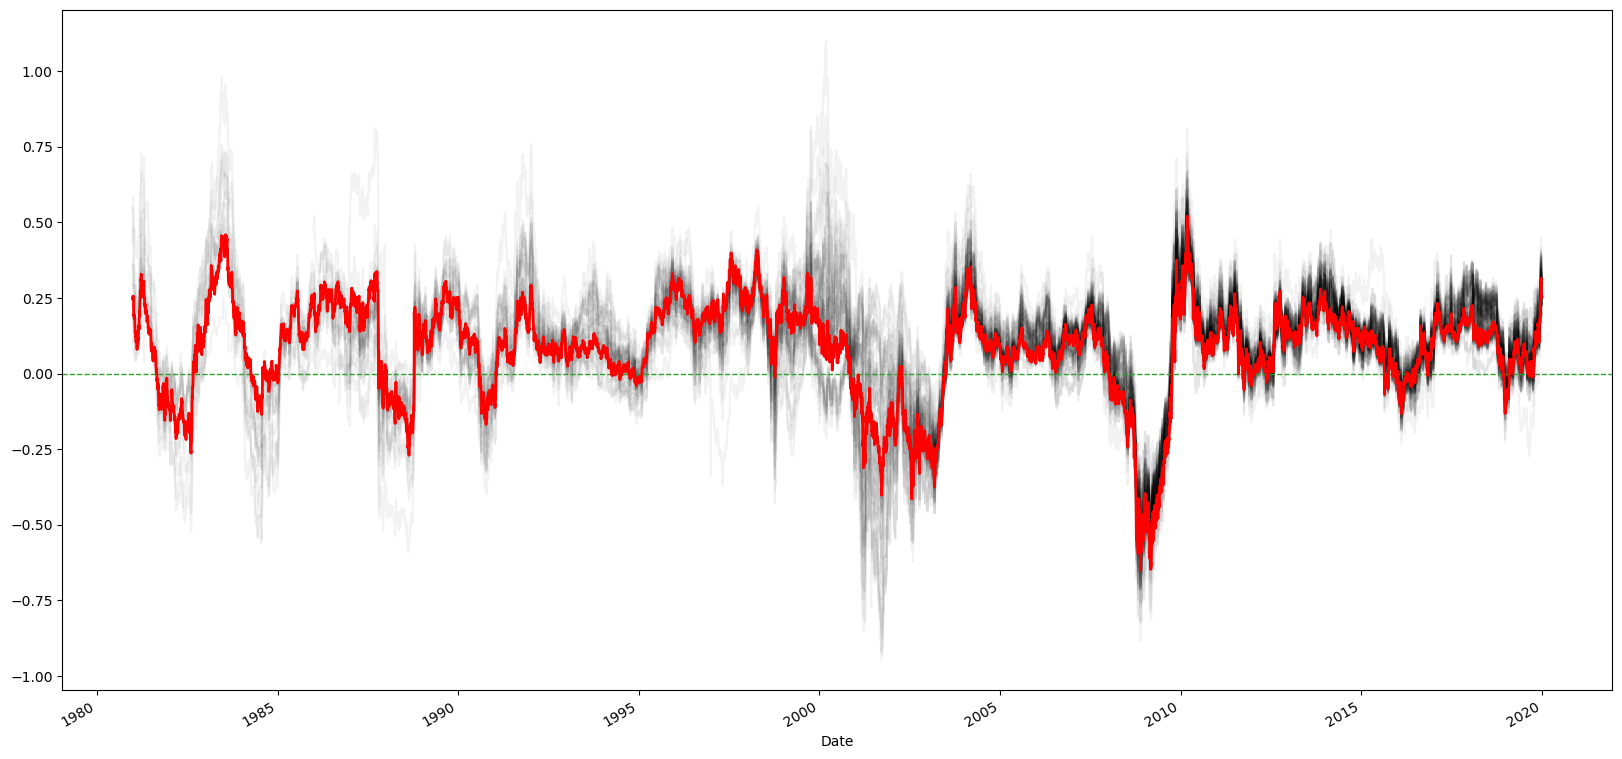

In [11]:
import matplotlib.pyplot as plt
# year over year rates of change are easier to interpret
yoy_return = np.log(close_data).diff(251)
fig, ax = plt.subplots(figsize = (20,10))
yoy_return.plot.line(legend = False, color = "k", alpha = .05, ax = ax)
ax.axhline(0, ls = "--", color = "C2", linewidth = 1)
yoy_return["S&P 500"].plot.line(color = "Red", linewidth = 2, ax = ax)

Text(0.5, 1.0, 'Index Returns to Market Return')

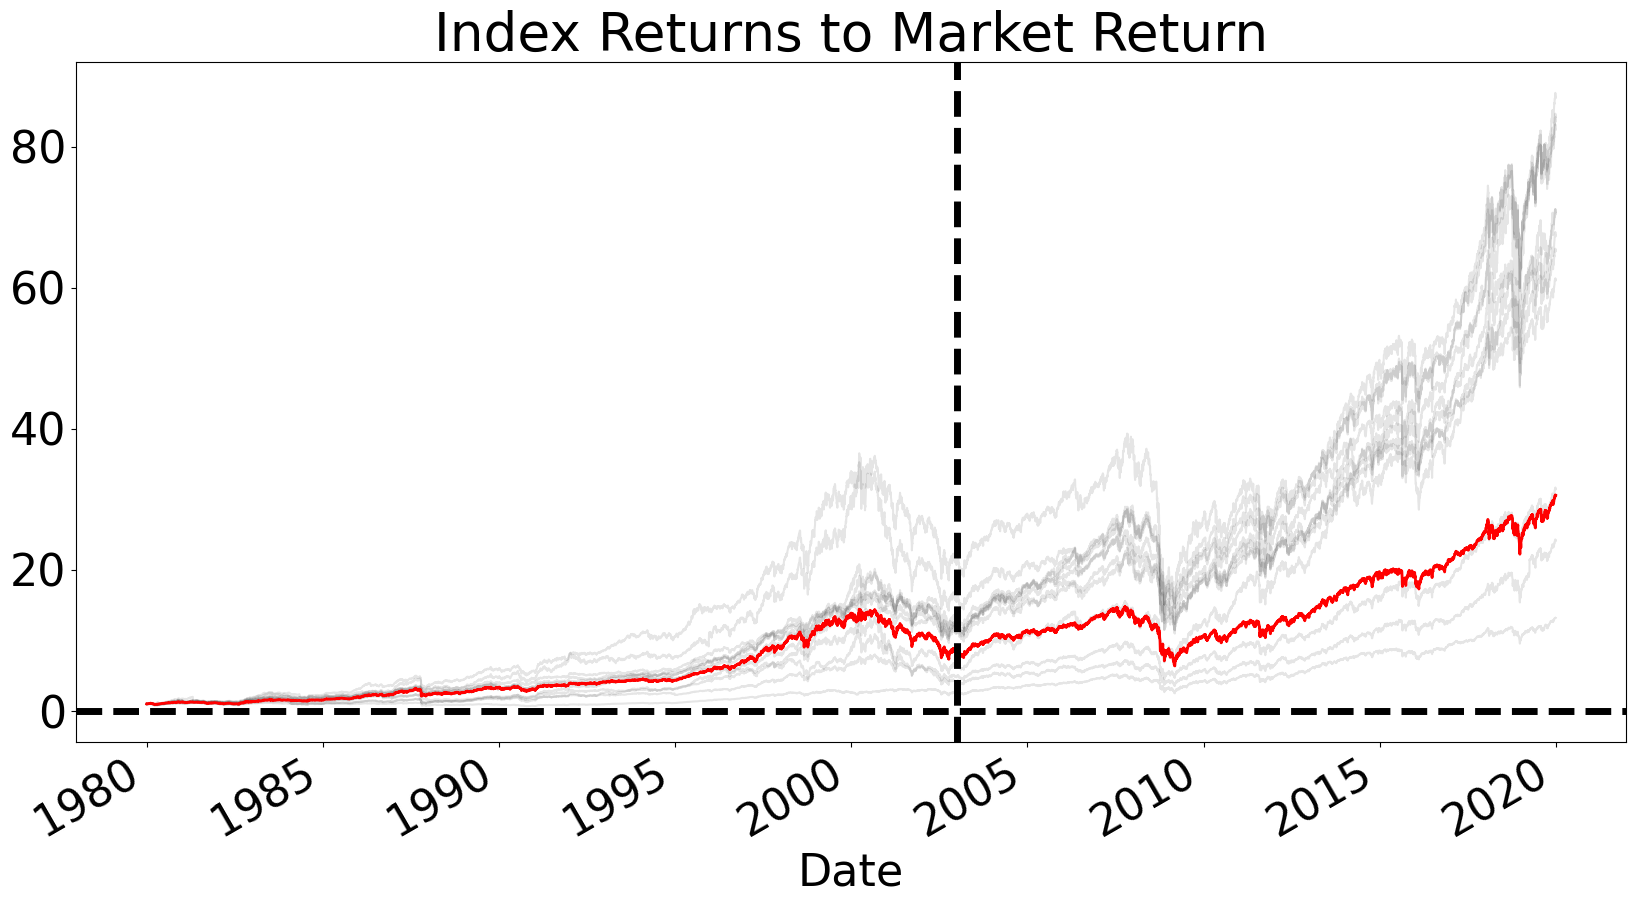

In [13]:
norm_data = close_data.div(close_data.iloc[0])
fig, ax = plt.subplots(figsize = (20,10))
norm_data.plot.line(legend = False, color = "k", alpha = .1, ax = ax)
ax.axhline(0, ls = "--", color = "k", linewidth = 5)
norm_data["S&P 500"].plot.line(color = "Red", linewidth = 2, ax = ax)
ax.axvline("2003", ls = "--", color = "k", linewidth = 5)
plt.rcParams.update({"font.size": 32})
ax.set_title("Index Returns to Market Return")

# Hypothesis Testing and Confidence Intervals

Statistical inference may be divided into two major areas: tests of hypothesis and estimation. __Hypothesis tests__ make inference about whether a sample parameter relates to a singular value in a chosen way, i.e., the same as that value.  __Estimations__ give a range of values that a sample parameter could take, with a chosen level of probability, called a confidence interval. 

## Hypothesis tests
As the name suggests, hypothesis tests use __hypotheses__. These are mutually exclusive, falsifiable statements. Only one can be true, and one of them will be true. Generally, these are the hypothses we begin with: 

- The _null_ hypothesis $H_o$: The true means of the the sample populations do not differ.
- The _alternate_ hypothesis $H_a$: The true means of the sample populations do differ.

### Types of Error
when making an inference about the value of the parameter, there are two types of error we can make: 

- Type 1 Error: This is the incorrect denial of a true null hypothesis - a "false positive"
- Type 2 Error: This is the incorrect acceptance of a false null hypothesis - a "false negative" 

In statistics, type 1 error is denoted by the Greek letter $\alpha$ and is called the significance level. Usually, the significance level is set to 0.05 (5%), implying that it is acceptable to have a 5% probability of incorrectly rejecting the true null hypothesis. Hence, most hypothesis tests are 95% confident in their inferences about a parameter and most confidence intervals give a range of values that the tester is 95% confident contains the true parameter. 

The probability of a type 2 error is denoted $\beta$ and $1-\beta$ is known as the power of the test. 

These two types of error are heavily related, and the tester faces a tradeoff - generally, when the probability of one type of error is minimized, the other increases. However the probability of committing both types of error decreases as the sample size increases. 

### Hypothesis Testing with Mutual Funds 
In the case of us determining the efficacy of an investment strategy, we must compare the return on strategy to the average return approximated by returns on investment in the S&P 500. These are our hypotheses: 

- $H_o$: There is no difference between the mutual fund's and S&P500's average monthly return. 
- $H_a$: The mutual funds have a higher mean gain than the S&P500. 

In particular, we would like to know if the mean returns for any and each index funds are different from and higher than returns earned by the S&P 500.

### T-values

The t-value, returned from the __T-test__ is used when we are dealing with a population of unknown, but normal, distribution. We have to check this assumption of normality prior to any t-test. Once we have done that, we can compare a given sample mean to one of three options: 

- **One Sample T-test:** The one sample t test compares the mean of your sample data to a known value. For example, we can compare a given funds average monthly return to some arbitrary value, like 7% or 10%. 
<h3 align="center">
    <font size="6">
        $t = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}}$
    </font>
    </h3> 
    
    
   - Null Hypothesis: sample mean is the same as hypothesized or theoretical mean
   - Alternative Hypothesis: sample mean is different from the hypothesized or theoretical mean
   - $\bar{X}$ is the sample mean 
   - $ \mu$ is the hypothesized value
   - $ \frac{s}{\sqrt{n}}$ is the standard error of the mean. The standard error of the mean is the standard deviation of the t-distribution with a given degrees of freedom. 

In [14]:
def t_value_1samp(data,mu): #(data, hypothesized value)
    x_bar = np.mean(data)
    s = np.std(data)
    n = len(data)
    df = n - 1
    t = (x_bar - mu) / (s / np.sqrt(n))
    
    return t, df

In [16]:
monthly_close_data = close_data.resample("M").first()
monthly_close_data.tail()

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,35.126404,39.759941,30.990507,39.542534,39.713707,25.792032,25.624296,35.268574,35.560001,46.166382,...,76.018013,40.260960,30.476662,99.783806,27.435659,39.930313,13.367850,26.328793,33.576424,2953.560059
2019-09-30,35.185394,38.784580,30.445383,40.388554,40.560371,25.256031,25.087616,35.319351,35.611176,45.121574,...,74.580864,39.150578,30.370668,97.703728,26.914335,38.901054,13.186357,25.675348,32.912350,2906.270020
2019-10-31,35.645607,38.633919,30.624964,39.771664,39.951832,25.128033,24.959454,35.779797,36.065323,45.679523,...,73.918159,39.294098,29.346062,96.186302,26.883209,39.103664,13.086224,26.262716,32.483128,2940.250000
2019-11-30,36.493103,40.663940,31.833950,40.644119,40.824951,26.328033,26.144949,36.630486,36.913815,48.072182,...,76.337387,40.850155,30.045620,100.013977,28.065918,41.202702,13.774642,27.672400,33.916565,3066.909912
2019-12-31,36.976173,41.718601,32.544636,40.555992,40.745579,27.064035,26.873867,37.106869,37.385201,49.166866,...,77.942230,41.703709,31.162083,102.793091,28.867357,42.458881,14.081302,28.127607,34.872189,3113.870117


In [18]:
monthly_returns = np.log(monthly_close_data).diff()
monthly_returns.tail()

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,-0.005503,-0.012487,-0.008626,0.016176,0.016344,-0.015695,-0.016124,-0.005742,-0.005979,-0.009413,...,-0.004088,0.003006,0.005347,-0.000598,0.006259,0.001625,0.002813,-0.005562,-0.003611,-0.003640
2019-09-30,0.001678,-0.024837,-0.017747,0.021170,0.021095,-0.021001,-0.021167,0.001439,0.001438,-0.022891,...,-0.019086,-0.027967,-0.003484,-0.021066,-0.019185,-0.026114,-0.013670,-0.025132,-0.019976,-0.016141
2019-10-31,0.012995,-0.003892,0.005881,-0.015392,-0.015117,-0.005081,-0.005122,0.012952,0.012672,0.012290,...,-0.008925,0.003659,-0.034319,-0.015653,-0.001157,0.005195,-0.007623,0.022619,-0.013127,0.011624
2019-11-30,0.023497,0.051211,0.038718,0.021699,0.021619,0.046650,0.046403,0.023497,0.023254,0.051054,...,0.032204,0.038836,0.023559,0.039023,0.043054,0.052288,0.051269,0.052285,0.043183,0.042176
2019-12-31,0.013150,0.025605,0.022079,-0.002171,-0.001946,0.027571,0.027498,0.012921,0.012689,0.022516,...,0.020805,0.020679,0.036485,0.027408,0.028155,0.030032,0.022018,0.016316,0.027786,0.015196


In [19]:
sp500 = monthly_returns["S&P 500"].dropna()

In [20]:
sp500.mean()

0.0070614806803863525

In [22]:
sp500.mean() * 12

0.08473776816463623

We can use the future value equation to calculate the monthly rate needed to obtain a yearly rate of $R$, given by this equation: 

>$ r = (R)^{\frac{1}{t}} - 1$
>
>$t$ is the time period of measurement 

A 7% annnualized rate is a monthly rate of the 12 root of 1.07: $1.07^\frac{1}{12} - 1$
Discount the overall rate of return to find the average rate of return. We will use this to define the mean of the standard normal distribution:

In [23]:
hypothesized_rate = .07 / 12
hypothesized_rate

0.005833333333333334

In [24]:
t_value_1samp(data = sp500, mu = hypothesized_rate)

(0.6072595645765047, 478)

In [26]:
stats.ttest_1samp(sp500, hypothesized_rate)

Ttest_1sampResult(statistic=0.6066253507590067, pvalue=0.5443875720700815)

- **Independent Samples T-test:** The The independent samples t test (also called the unpaired samples t test) helps you to compare the means of two sets of data that came from different sources. Normally, we are checking to see if the means of the data are significantly different from a differnece of zero. But , we can also check if they are significantly different from a hypothesized or theoretical value. For instance, say we had two groups of males and one group of females and we wanted to compare average heights between the groups. For the males, we would check to see if they differed significantly from an average height difference of zero, whereas when comparing the males to the females we may want to see if they were significantly different from an average difference of 2 inches. **This hypothesized difference, $(\mu_1 - \mu_2)$, will usually be zero, but not always.**

<h3 align="center">
    <font size="6">
        $ t = \frac{(\bar{x_1}-\bar{x_2})-(\mu_1 - \mu_2)}{\sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}}$
    </font>
    </h3> 
    
   
   - Note that this t-test is one variation of the independent samples t-test that _does not_ assume equal variance between the samples
   
    - Null Hypothesis: sample mean is the same as hypothesized or theoretical mean
    - Alternative Hypothesis: sample mean is different from the hypothesized or theoretical mean

In [27]:
def t_value_ind_samp(a, b, hypothesized_difference=0, equal_var=False):
    
    # convert a and b to numpy arrays
    a = np.array(a)
    b = np.array(b)
    
    # grab variance and length of each of those
    s1, n1 = np.var(a) , len(a)
    s2, n2 = np.var(b),  len(b)
    
    # if paired samples, df calculation is different
    if (equal_var):
        df = n1 + n2 - 2
        svar = ((n1 - 1) * s1 + (n2 - 1) * s2) / float(df)
        denom = np.sqrt(svar * (1.0 / n1 + 1.0 / n2))
    else:
        vn1 = s1 / n1
        vn2 = s2 / n2
        df = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))
        denom = np.sqrt(vn1 + vn2)

    d = np.mean(a) - np.mean(b) - hypothesized_difference
    t = d / denom
    return t, df

In [28]:
prgfx = monthly_returns["PRGFX"].dropna()
sp500.mean(), prgfx.mean()

(0.0070614806803863525, 0.007124729395121376)

In [29]:
t_value_ind_samp(sp500, prgfx)

(-0.021225139361568997, 950.1086062669021)

- **Paired Samples T-test:** A paired t test (also called a correlated pairs t-test, a paired samples t test or dependent samples t test) is where you run a t test on dependent samples. Dependent samples are essentially connected — they are tests on the same person or thing. This would be useful for us if we were doing some sort of scientific treatment to the same population - not something that is done to mutual funds. For our function, we can simply add an optional argument "equal_var" to our independent t-test funtion which will cause it to act like a paired samples t-test. 

### The T Probability Distribution
When comparing two samples drawn from a population with unknown parameters, we return a t-value(defined below) similar to the z-value, and a corresponding degrees of freedom, indicating the size of our samples. If the size of our samples is high, we can have more confidence in our result. The t-distribution is defined as: 

<h3 align="center">
    <font size="6">
        $ f(T) = \frac{(1 + \frac{T^2}{\nu})^{\frac{-(\nu+1)}{2}}}{B(0.5,0.5\nu)\sqrt(\nu)}$
    </font>
    </h3> 

    
- Where $\nu$ is the degrees of freedom of the distribution and B is the beta function, which is beyond the scope of this book and can be pulled from the scipy.stats library. 
- This is the same distribution shown in the previous chapter; the Cauchy has one degree of freedom and the Standard normal is the form of the t-distribution with more than 30 degrees of freedom


In [30]:
import scipy.special as sc

# define a function to create the actual distribution from which we can analyze our t value from the t test
def t_distribution(df, t): 
    t_dist_val = ((1 + t**2 / df)
                      **(-(df + 1) / 2)) / (sc.beta(.5, .5 * df) * np.sqrt(df))
    return t_dist_val

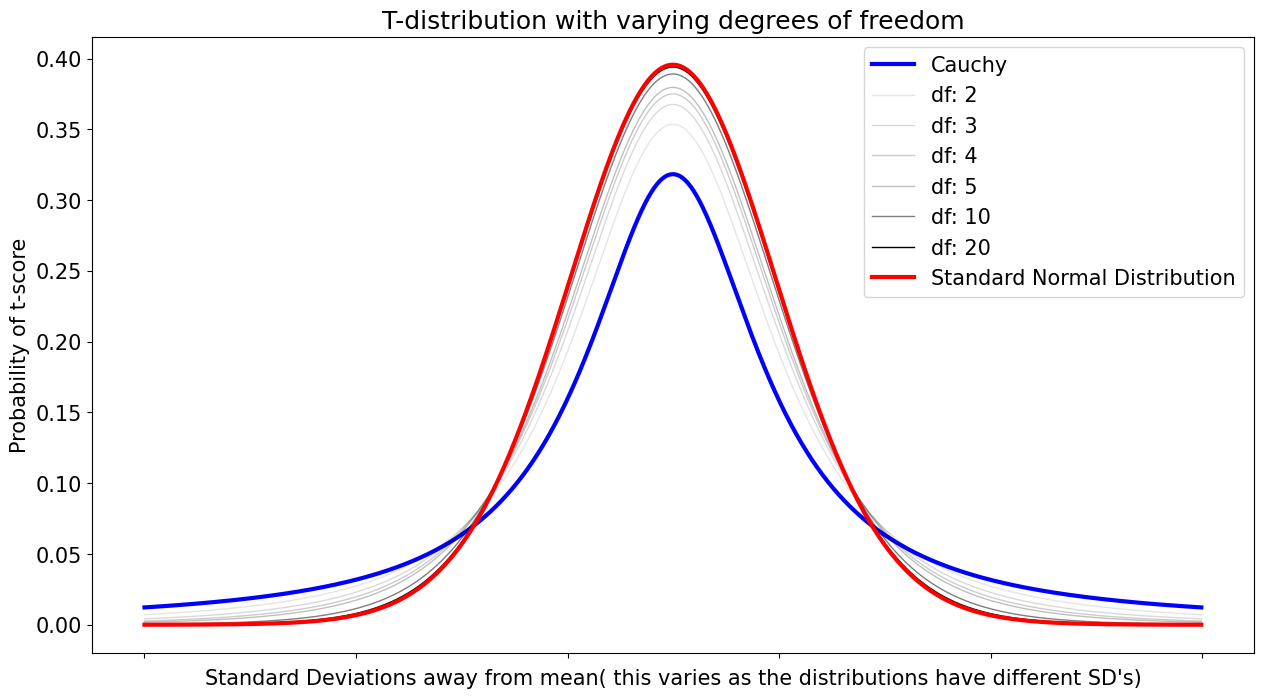

In [33]:
fig, ax = plt.subplots(figsize=(15, 8))

x = np.linspace(-5, 5, 1000)

cauchy = t_distribution(1, x)
ax.plot(cauchy, '-', lw=3, alpha=1, label="Cauchy", color='b')
t_df = [2, 3, 4, 5, 10, 20]

for df in t_df:
    dist = t_distribution(df, x)
    ax.plot(dist, '-', lw=1, alpha=df / 20, label="df: " + str(df), color='k')
gaussian = t_distribution(30, x)

ax.plot(gaussian,
        lw=3,
        alpha=1,
        color='r',
        label='Standard Normal Distribution')

plt.rcParams.update({"font.size": 15})
ax.set_ylabel("Probability of t-score")
ax.set_xlabel(
    "Standard Deviations away from mean( this varies as the distributions have different SD's)"
)
plt.title("T-distribution with varying degrees of freedom")
ax.set_xticklabels(labels="")
plt.legend()

Once we get our t-score, we plug it into the equation shown below to get it's p-value. The equation uses the t-distributions's __Cumulative Density Function__. This distribution models the probability that the random variable $T$ takes at most the value $t$. We get a corresponding __p-value__, shown on the y-axis. This value is the probability of our gotten t-value if the true means were the same. 

<h3 align="center">
    $ p =  2 \cdot (1-CDF_{t_{n-1}}(|t|)) $
<h3> 

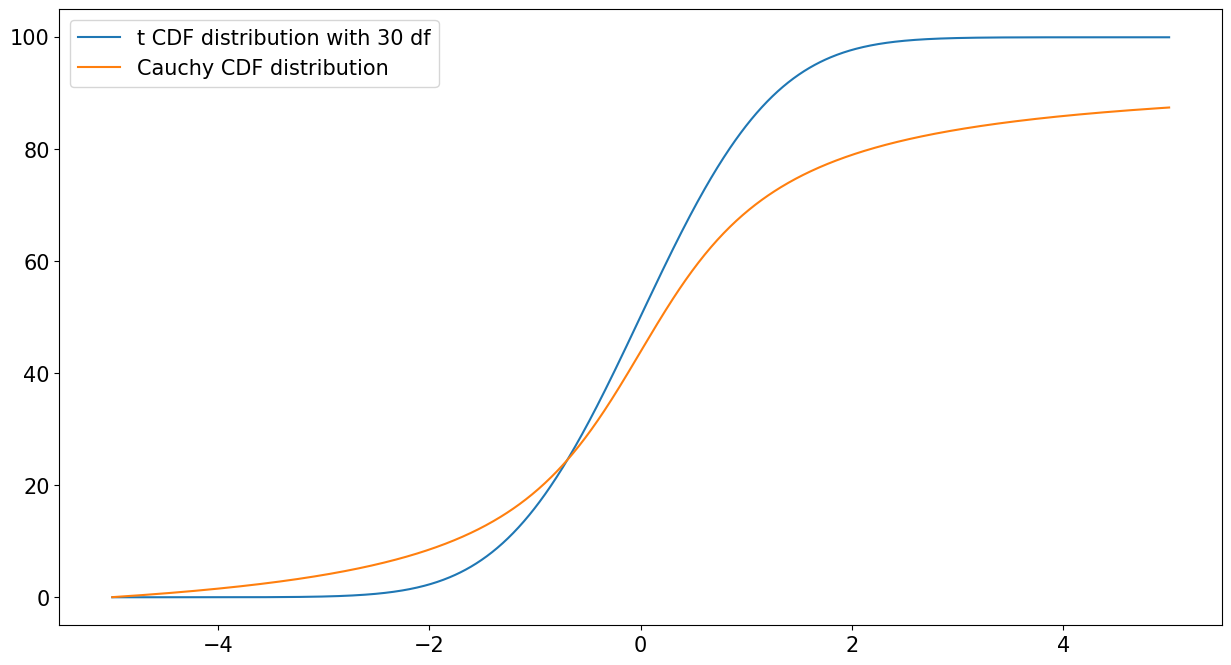

In [34]:
fig, ax = plt.subplots(figsize = (15,8))

x = np.linspace(-5,5, 1000)
t_dist = t_distribution(150000, x)
cauchy = t_distribution(1, x)
# iterate along the linspace
f_dist = t_dist.copy()
cauchy_f_dist = cauchy.copy()

for i in range(len(x)):
    f_dist[i] += f_dist[i-1]
    cauchy_f_dist[i] += cauchy_f_dist[i-1]
    
# plot data:
ax.plot(x, f_dist, label = 't CDF distribution with 30 df')
ax.plot(x, cauchy_f_dist, label = 'Cauchy CDF distribution')

plt.legend()

- If the corresponding p-value from our t-value is too low, we choose to __reject the null hypothesis $H_o$__, and say that our samples come from different populations who's means are different. This is a "statistically significant" result. 


- If the p-value is sufficiently high, we __fail to reject the null hypothesis $H_o$__, and say that there is a high enough chance that the samples came from populations with the same means. This is a "statistically insignificant" result. 


- The value at which significance occurs, $\alpha$, and is most commonly 0.05.

In [35]:
import scipy.stats as stats

# function that allows us to evaluate the t distribution at a given t value and df
def t_test(a, b, kind):
    
    if kind == 'one_sample': 
            t_val, df = t_value_1samp(a, b)
            print (t_val, df)
    elif kind  == 'independent': 
            t_val, df = t_value_ind_samp(a, b)
    elif kind == 'paired': 
            t_val, df = t_value_ind_samp(a, b, equal_var=True)
            
    # cdf gives probability of a value at least as extreme as observed happening; for two-sided tests this is doubled
    p_value = (1-stats.t.cdf(np.abs(t_val), df-1))  *2
    
    if p_value > .05:
        return_string = "T-value: " + str(t_val) + ", P-value: " + str(
            p_value) + ", Fail to reject null hypothesis."
    else:
        return_string = "T-value: " + str(t_val) + ", P-value: " + str(
            round(p_value, 5)) + ", Reject null hypothesis."
        
    return return_string

In [36]:
hypothesized_rate = 1.07 **(1/12) - 1
t_test(sp500, hypothesized_rate, 'one_sample')

0.6958593521205105 478


'T-value: 0.6958593521205105, P-value: 0.48685580818447427, Fail to reject null hypothesis.'

## Testing for Normality

Statistical tests commonly generate a t-statistic whose interpretation must be drawn from a t-distribution. Next, let's test to see if the data used in chapter 4 follows the assumption that observations fit  a normal distribution. 

### Jarque-Bera Normality Test

The Jarque-Bera test considers whether or not a distribution's skewness and kurtosis match the skewness and kurtosis of a normal distribution:

$$t = \frac{n}{6}[S^2 + \frac{(K-3)^2}{4}]$$

The t-statistic represents the result of the test of the null hypothesis that the sample tested is not normally distributed with a given skewness and kurtosis. Notice that the skewness and kurtosis values control for the standard deviation of the distribution. Thus, despite the fact that the distributions are not identical, when controlling for the size of the standard deviation, they appear close of enough to being normally distributed that the test rejects the null hypothesis.

In [37]:
from stats import *
def jarque_bera_test(series, use_sample_ks = False):
    series.dropna(inplace = True)
    # print series
    n = series.shape[0]
    
    k = kurtosis(series, sample = use_sample_ks)
    s = skewness(series, sample = use_sample_ks)
    t = n / 6 * (s ** 2 + (k - 3) ** 2 / 4)

    df = n - 1
    print(k, s, t)
    p = scipy.stats.t.sf(t, df=df)
    return t, p


In [38]:
from statsmodels.stats.stattools import jarque_bera
import scipy
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import numpy as np

start = datetime(2012, 1 , 1)
end = datetime.today()

stock_data = {}
stocks = ["MSFT", "AAPL", "PG", "TSLA", '^GSPC']
for key in stocks:
    stock_data[key] = web.get_data_yahoo(key, start, end)["Close"]
stock_data = pd.DataFrame(stock_data).rename(columns = {"^GSPC":"S&P500"})
price_change_data = np.log(stock_data).diff()
price_change_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,MSFT,AAPL,PG,TSLA,S&P500
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.023261,0.005360,-0.000449,-0.013264,0.000188
2012-01-05,0.010167,0.011041,-0.004201,-0.021522,0.002939
2012-01-06,0.015415,0.010400,-0.002408,-0.007773,-0.002540
2012-01-09,-0.013250,-0.001587,0.004211,0.012556,0.002259
...,...,...,...,...,...
2023-03-30,0.012541,0.009841,0.004350,0.007195,0.005699
2023-03-31,0.014851,0.015523,0.008375,0.060504,0.014333
2023-04-03,-0.003718,0.007672,0.005500,-0.063119,0.003692


In [39]:
for key, val in price_change_data.items():
    print(key)
    print("My JB Function:   ", jarque_bera_test(val))
    print("scipy JB Function:", jarque_bera(val)[:2])

MSFT
11.71977132246921 -0.21998156078720899 8994.901576811231
My JB Function:    (8994.901576811231, 0.0)
scipy JB Function: (8994.90157681113, 0.0)
AAPL
8.717560970983726 -0.27814076802433274 3893.994407303274
My JB Function:    (3893.994407303274, 0.0)
scipy JB Function: (3893.9944073033244, 0.0)
PG
15.017105782999689 -0.047754845086782835 17041.55451308515
My JB Function:    (17041.55451308515, 0.0)
scipy JB Function: (17041.554513085142, 0.0)
TSLA
8.031301070242769 -0.048271371923042886 2988.150693376213
My JB Function:    (2988.150693376213, 0.0)
scipy JB Function: (2988.150693376209, 0.0)
S&P500
19.305295865472267 -0.8015464523648662 31675.044454370254
My JB Function:    (31675.044454370254, 0.0)
scipy JB Function: (31675.04445437014, 0.0)


## Confidence Intervals

The confidence interval gives us the range of values that have a $1-\alpha$ probability of containing the population mean, based off of our sample mean. Confidence intervals, as hypothesis tests do, make use of the standard error of the mean of a sample. For a sample with mean $\bar{x}$, the confidence interval lower and upper bounds, respectively, are found by these formulas: 
<h3 align="center">
    <font size="4">
        $ CI = {\bar{x} - t_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}, \bar{x} + t_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}}$
    </font>
    </h3> 
- Where $t_{\frac{\alpha}{2}}$ is the $1-\frac{\alpha}{2}$ quantile of the $t_{n-1}$ distribution

This function can be easily built in code using the _percent point function_ in Scipy. This function gives the percentage of the t distribution behind a given point. This is also known as the quintile. We first make a function to return the quintile in a t distribution associated with a given df and alpha level, and then make a function to make confidence interval for passed data: 

In [42]:
def t_quintile(df, alpha):
    q = (1 + alpha)/2
    a = stats.t.ppf(q, df) #ppf = percent point function
    return a

In [41]:
t_quintile(len(sp500), 0.05)

0.06273964329541434

In [43]:
def confidence_interval(data,alpha):
    n = len(data)
    df = n-1
    x_bar = np.mean(data)
    SE = np.std(data) / np.sqrt(n)
    CI_quintile = t_quintile(df,alpha)
    CI = x_bar - CI_quintile * SE, x_bar + CI_quintile * SE
    return CI

In [44]:
sp500_CI = confidence_interval(sp500, 0.05)
sp500_CI

(0.006934593241426297, 0.007188368119346408)

In [45]:
sp500_yearly_CI = (1 + sp500_CI[0]) ** 12, (1 + sp500_CI[1]) ** 12
sp500_yearly_CI

(1.0864634873490415, 1.0897538656572028)

In [46]:
yearly_close_data = pd.DataFrame(close_data).resample("Y").first()
yearly_changes = np.log(yearly_close_data).diff()
yearly_changes.tail()

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,NaN,0.097941,0.121479,0.107516,NaN,0.123750,0.125250,0.130136,0.129860,0.093210,...,0.130998,0.135191,0.109603,0.094992,0.111440,0.098801,0.084267,0.116717,0.130834,0.116434
2016-12-31,NaN,0.034507,-0.027854,0.013938,0.008688,-0.004140,-0.006372,-0.039964,-0.041698,0.019134,...,0.046649,0.073910,0.048352,0.082509,0.028135,0.043593,0.026901,-0.043783,0.060857,-0.022375
2017-12-31,NaN,0.108929,0.156921,0.104077,0.105246,0.111734,0.109688,0.151742,0.149827,0.140938,...,0.084670,0.096364,0.012293,0.043827,0.069597,0.073705,0.054890,0.148116,0.025143,0.114947
2018-12-31,0.152799,0.235910,0.182138,0.259875,0.260812,0.205085,0.203352,0.165565,0.164093,0.212738,...,0.224042,0.229419,0.327968,0.315654,0.263689,0.277257,0.243151,0.153747,0.274511,0.177295
2019-12-31,-0.027555,-0.043299,-0.077403,0.052536,0.053575,-0.032740,-0.034801,-0.028524,-0.030323,-0.077350,...,-0.034572,-0.011837,-0.009790,0.004878,-0.020775,-0.002644,-0.054439,-0.093813,-0.005056,-0.071404


In [47]:
yearly_return_CIs = confidence_interval(yearly_changes, 0.05)

/Users/audrabuysse/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


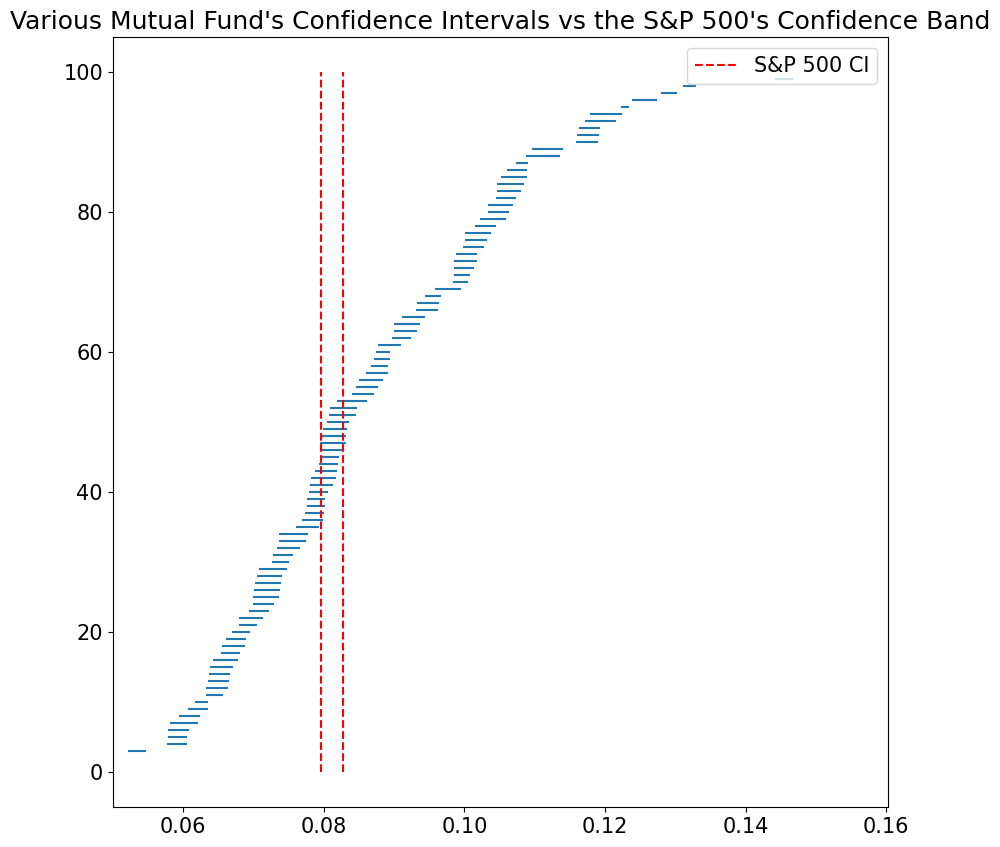

In [48]:
fig, ax = plt.subplots(figsize = (10, 10))
Y_axis = np.arange(len(yearly_return_CIs[0]))

ax.hlines(y = Y_axis, xmin = yearly_return_CIs[0].sort_values(), xmax = yearly_return_CIs[1].sort_values() )
ax.vlines(x = [yearly_return_CIs[0]["S&P 500"],yearly_return_CIs[1]["S&P 500"]], ymin = 0, ymax = 100, label = "S&P 500 CI", color="r", linestyle="--")
ax.set_title("Various Mutual Fund's Confidence Intervals vs the S&P 500's Confidence Band")
ax.set_xlim(0.05)
ax.legend()

# ANOVA
While using T-tests and Z-tests to analyze means of groups, we were restricted to only being able to compare two groups at a time. What if we wanted to see of there was significant differences between more than two groups? The **ANOVA**, or **Analysis of Variance** techniques allow us to test the null hypothesis that there is no significant difference between $k$ (some integer larger than 2) groups. 

- $H_o$: $\mu_1 = \mu_2 = \cdots = \mu_k$
- $H_a$: At least two of the means are not equal. 

#### Mutual Fund Categories
For our motivating example, we will continue to use our mutual fund data, but we must be able to group our mutual funds into categories. Luckily, the dataset contains a column labeled "Morningstar Category", which is assigned by [Morningstar](http://im.mstar.com/im/newhomepage/Morningstar_Category_Definitions_US_June_2016.pdf) based off of a funds previous holdings statistics and tries to give investors information about a fund's risk and investment strategy. 

In [49]:
mutual_fund_data[["Symbol", "Morningstar Category"]]

,Symbol,Morningstar Category
0,AGTHX,Large Growth
1,FCNTX,Large Growth
2,CWMAX,Large Blend
3,CWMCX,Large Blend
4,CWMEX,Large Blend
...,...,...
95,FDTRX,Large Growth
96,FDYZX,Large Growth
97,BBVLX,Large Value
98,PEYAX,Large Value


In [50]:
mutual_fund_data["Morningstar Category"].value_counts()

Large Growth      51
Large Value       20
Large Blend       17
Mid-Cap Growth     6
Mid-Cap Value      2
Health             1
Mid-Cap Blend      1
Communications     1
Small Value        1
Name: Morningstar Category, dtype: int64

In [60]:
# index to see which ones have more than 2
fund_types = mutual_fund_data["Morningstar Category"].value_counts() > 2
fund_types

Large Growth       True
Large Value        True
Large Blend        True
Mid-Cap Growth     True
Mid-Cap Value     False
Health            False
Mid-Cap Blend     False
Communications    False
Small Value       False
Name: Morningstar Category, dtype: bool

In [61]:
relevant_fund_types = fund_types[fund_types]
relevant_funds = mutual_fund_data[mutual_fund_data["Morningstar Category"].isin(relevant_fund_types.index)]
relevant_funds

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [62]:
relevant_fund_type_names = {}
for fund_type in relevant_fund_types.index:
    relevant_fund_type_names[fund_type] = relevant_funds["Symbol"][relevant_funds["Morningstar Category"] == fund_type]

In [79]:
# make four lists for four fund types: 
fund_type_returns = {}

for key in relevant_fund_type_names.keys():
    # make a new list
    fund_type_returns[key] = []
    for val in relevant_fund_type_names[key]:
        fund_type_returns[key].extend(monthly_returns[val].dropna())

In [80]:
[print(f"{key}: {np.mean(fund_type_returns[key])}") for key in fund_type_returns]

Large Growth: 0.00834602706649644
Large Value: 0.007025138153396381
Large Blend: 0.007410825546892301
Mid-Cap Growth: 0.009292540467364913


[None, None, None, None]

### Assumptions needed for ANOVA
There are three assumptions that must be met in order to carry out an ANOVA test: 

1. The experimental errors of the data are normally distributed
2. Homoscedasticity - the variances of your factors are all roughly the same (and at least follow the same distribution)
3. Samples are independent - Selection of one sample had no effect on any other sample

7.3370493571402475 -0.8754087761765784 11587.560077678085

JB Test: (11587.560077678085, 0.0)
7.398919194331181 -0.9939022645550255 4477.840172268198

JB Test: (4477.840172268198, 0.0)
6.459561174027567 -0.9328003530970599 2738.3404809649546

JB Test: (2738.3404809649546, 0.0)
6.770046432682667 -0.7842225451879798 1042.0793816317348

JB Test: (1042.0793816317348, 0.0)


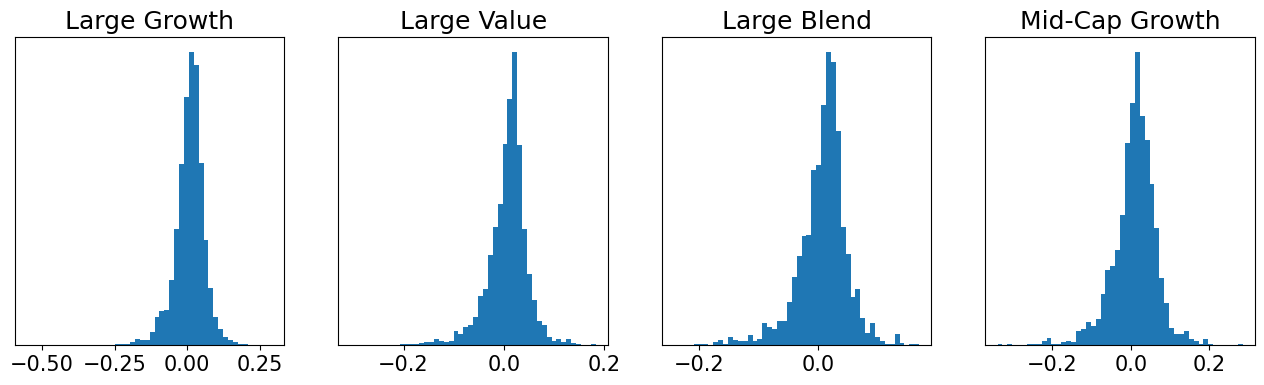

In [66]:
fig, axs = plt.subplots(1, 4 , figsize = (16, 4))
for num, key in enumerate(fund_type_returns): 
    series = pd.Series(fund_type_returns[key])
    axs[num].hist(series, bins = 50)
    axs[num].set_title(key)
    axs[num].set_yticks([])
    print("\nJB Test: " + str(jarque_bera_test(series)))

## F-Statistic
The distribution used for the hypothesis test is a new one. It is called the F distribution, named after Sir Ronald Fisher, an English statistician. The F-statistic is a ratio. There are two sets of degrees of freedom; one for the numerator and one for the denominator. 

The F distribution is derived from the t-distribution. The values of the F distribution are squares of the
corresponding values of the t-distribution. One-Way ANOVA expands the t-test for comparing more than two groups.
The scope of that derivation is beyond the level of this textbook. 

To calculate the F ratio, two estimates of the variance are made:

1. **Variance between samples**: An estimate of $\sigma^2$ that is the variance of the sample means multiplied by n (when the sample sizes are the same.). If the samples are different sizes, the variance between samples is weighted to account for the different sample sizes. The variance is also called **variation due to treatment or explained variation.**

2. **Variance within samples**: An estimate of $\sigma^2$ that is the average of the sample variances (also known as a pooled variance). When the sample sizes are different, the variance within samples is weighted. The variance is also called **the variation due to error or unexplained variation.**

- $SS_b$ = the sum of squares that represents the variation among the different samples

- $SS_w$ = the sum of squares that represents the variation within samples that is due to chance.

To find a "sum of squares" means to add together squared quantities that, in some cases, may be weighted. We used sum of squares to calculate the sample variance and the sample standard deviation. 

MS means "mean square." $MS_b$ is the variance between groups, and $MS_w$ is the variance within groups. These measurements are the total sum of squares of their variances divided by the degrees of freedomom of the measure to give a mean value. 

#### Caluculating the F-Statistic

#### Counting Statistics
In order to accurately calculate the _Mean sum of squares_ we need to have denominator to divide the _total sum of squares_ by. For the sum of squares between groups, this is one minus the number of groups, and for the sum of squares within groups, this is the total number of observations minus the number of groups.

- $k$ = the number of different groups
- $n_j$ = the size of the $j^{th}$ group
- $N$ = total number of all the values combined (total sample size: $\sum{n_j}$)
- $df$'s for the numerator(between samples): $df_b = k – 1$
- $df$'s for the denominator($df$'s within samples): $df_w = k – 1$ 

In [67]:
def get_anova_counts(*args):
    k = len(args)
    N = 0
    for arg in args:
        N += len(arg)
    dfbn = k - 1
    dfwn = N - k

    return k, N, dfbn, dfwn

In [68]:
get_anova_counts(fund_type_returns["Large Growth"],
                 fund_type_returns['Large Value'],
                 fund_type_returns['Large Blend'],
                 fund_type_returns['Mid-Cap Growth'])

(4, 23079, 3, 23075)

#### Sum of Squares Between Groups
- Explained variation: sum of squares representing variation among the different samples:

    - $SS_{b} = \sum_{j = 1}^{k}{n_j(\bar{x_j} - \bar{x})^2}$
    
    
This measures the _total_ variation between the samples. For each group passed, the mean of all values is subtracted from the mean of the group, and that value is squared, then multiplied by the size of each group, because the measure must be scaled to the size of the group to capture the total sum of squares. 

In [81]:
def SSB(*args):
    ssb = 0
    alldata = np.concatenate(args)
    
    grand_mean = np.mean(alldata)
    
    for arg in args:
        group_mean = np.mean(arg)
        
        n = len(arg)
        val = n * (group_mean - grand_mean) * 2
        
        ssb += val
    return ssb

In [84]:
def SSW(*args):
    ssw = 0
    for arg in args: 
        group_mean = np.mean(arg)
        val = 0 
        for i in arg:
            val += np.sum(i - group_mean)**2
        ssw += val
    return ssw

In [85]:
SSW(fund_type_returns["Large Growth"],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

53.803153980346494

In [86]:
def get_sum_square_stats(*args): 
    ssw = SSW(*args)
    ssb = SSB(*args)
    sst = ssb + ssw
    return ssw, ssb, sst

In [87]:
get_sum_square_stats(fund_type_returns["Large Growth"],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

(53.803153980346494, 4.618527782440651e-14, 53.803153980346536)

#### Mean Sum of Squares 

For the F-statistic and by extension the ANOVA test, the _mean_ sum of squares with and between of are greater interest than the total sum of squares. Dividing each total member by the appropriate degrees of freedom allows us to compare ratios, and determine the true observed difference in variance. 

- Mean square (variance estimate) explained by the different groups:
$MS_b = \frac{SS_b}{df_b} = \frac{SS_b}{k-1}$
- Mean square (variance estimate) that is due to chance (unexplained): $MS_w = \frac{SS_w}{df_w} = \frac{SS_w}{n - k}$

The one-way ANOVA test depends on the fact that $MS_b$ can be influenced by population differences among means of the several groups. Since $MS_w$ compares values of each group to its own group mean, the fact that group means might
be different does not affect $MS_w$. The null hypothesis says that all groups are samples from populations having the same normal distribution. The alternate
hypothesis says that at least two of the sample groups come from populations with different normal distributions. If the null hypothesis is true, $MS_b$ and $MS_w$ should both estimate the same value. 

Finally, we arrive at the **F-Statistic**, which will function for us as the T-Statistic did earlier this chapter, as an input into one minus its cumulative density function to recieve a p-value telling us the likelihood of its occurence if our null hypothesis was true. 

- $ F = \frac{MS_b}{MS_w}$

With a density function:
<h3 align="center">
    <font size="5">
        $ f(x, df_1, df_2) = \frac{df_2^{df_2/2} df_1^{df_1/2} x^{df_1 / 2-1}}
                        {(df_2+df_1 x)^{(df_1+df_2)/2}
                         \beta(df_1/2, df_2/2)}$
    </font>
    </h3> 


where $df_1$ and $df_2$ are the
shape parameters and
$\beta$ is the beta function.  The formula for the beta function
is
<ul>
$B(a, b) = \int_0^1 t^{a-1}(1-t)^{b-1}dt
        = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$,
 
<p>where <span class="math notranslate nohighlight">\(\Gamma\)</span> is the gamma function.</p>
    
These funtions could be implemented manually using basic math symbols, but for our purposes, importing them from Scipy will be much more pragmatic.
    
We create the last accessory function in our ANOVA analysis called _finish_anova_. This models the survival function of the F-distribution(1 - CDF), which returns the p-value in the same way the survival function of t-distribution gave us a p-value. 

In [88]:
from scipy.stats import f as f_dist
def finish_anova(f, dfwn, dfbn): 
    # use scipy to plug f-value into f distribution to return p-value
     p_value =  1 - f_dist.cdf(f, dfwn, dfbn)
    
     if p_value > .05:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            p_value) + ", Fail to reject null hypothesis."
     else:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            round(p_value, 5)) + ", Reject null hypothesis."

     return return_string

In [89]:
def anova(*args):

    k, N, dfbn, dfwn  = get_anova_counts(*args)
    
    ssw, ssb, sst = get_sum_square_stats(*args)

    msb = ssb / dfbn
    msw = ssw / dfwn
    
    f = msb / msw

    return finish_anova(f, dfbn, dfwn)

In [90]:
anova(fund_type_returns["Large Growth"],
      fund_type_returns['Large Value'],
      fund_type_returns['Large Blend'],
      fund_type_returns['Mid-Cap Growth'])

'F-value: 6.602619654276984e-12, P-value: 1.0, Fail to reject null hypothesis.'

In [91]:
stats.f_oneway(fund_type_returns["Large Growth"],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

F_onewayResult(statistic=1.410831935742491, pvalue=0.23745782350499567)